In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


G = 0.15656
pi = np.pi

max = np.maximum
min = np.minimum


class Corps:
    def __init__(self):
        self.Masse = 0
        self.Position = np.zeros(3)
        self.Vitesse = np.zeros(3)

    def __str__(self):
        return "Masse : " + str(self.Masse) + "\nPosition : " + str(self.Position) + "\nVitesse : " + str(self.Vitesse) + "\n"

class Vecteur:
    def __init__(self):
        self.Axe = np.zeros(3)

class RK:
    def __init__(self):
        self.X = np.zeros(4)
        self.Y = np.zeros(4)
        self.Z = np.zeros(4)

In [2]:
def InistSystConnu(choix):
    Etoile = [Corps() for i in range(2)]
    KX = [RK() for i in range(2)]
    KV = [RK() for i in range(2)]
    VectPost = Vecteur() 
    VectForce = Vecteur()
    if choix == 0:
      Etoile[0].Masse=20;
      Etoile[0].Position[0] =-100
      Etoile[0].Position[1] =0
      Etoile[0].Position[2] =-200;
      Etoile[0].Vitesse[0]=0.5
      Etoile[0].Vitesse[1]=0.2
      Etoile[0].Vitesse[2]=1;

      Etoile[1].Masse=20;
      Etoile[1].Position[0] =100
      Etoile[1].Position[1] =0
      Etoile[1].Position[2] =200;
      Etoile[1].Vitesse[0]=-0.5
      Etoile[1].Vitesse[1]=-0.2
      Etoile[1].Vitesse[2]=-1;       
    else: 
      Etoile[0].Masse=80;
      Etoile[0].Position[0] =-100
      Etoile[0].Position[1] =0
      Etoile[0].Position[2] =-200;
      Etoile[0].Vitesse[0]=0.1
      Etoile[0].Vitesse[1]=1
      Etoile[0].Vitesse[2]=0.2;

      Etoile[1].Masse=80;
      Etoile[1].Position[0] =100
      Etoile[1].Position[1] =0
      Etoile[1].Position[2] =200;
      Etoile[1].Vitesse[0]=-0.1
      Etoile[1].Vitesse[1]=-1
      Etoile[1].Vitesse[2]=-0.2; 

    return Etoile, KX, KV, VectPost, VectForce

In [3]:
Etoile, KX, KV, VectPost, VectForce = InistSystConnu(1)

In [4]:
def print_Etoile(Etoile):
    for n,etoile in enumerate(Etoile):
        print("Etoile N°",n)
        print(etoile)


print_Etoile(Etoile)

Etoile N° 0
Masse : 80
Position : [-100.    0. -200.]
Vitesse : [0.1 1.  0.2]

Etoile N° 1
Masse : 80
Position : [100.   0. 200.]
Vitesse : [-0.1 -1.  -0.2]



In [5]:
def EnergiePotentiel(NombreDeCorps,Etoile):
    Potentiel = 0
    for i in range(NombreDeCorps):
        for j in range(NombreDeCorps):
            if i != j:
                Potentiel += G*Etoile[i].Masse*Etoile[j].Masse/np.linalg.norm(Etoile[i].Position-Etoile[j].Position)
    return Potentiel

EnergiePotentiel(2,Etoile)

4.481008672734299

In [6]:
def EnergieCinetique(NombreDeCorps,Etoile):
    Cinetique = 0
    for i in range(NombreDeCorps):
        Cinetique += 0.5*Etoile[i].Masse*np.linalg.norm(Etoile[i].Vitesse)**2
    return Cinetique

EnergieCinetique(2,Etoile)

84.00000000000003

In [7]:
def RungeKutta(NombreDeCorps, PasDeTemps, VectPost, VectForce, Etoile, KX, KV):

    def acceleration(EnCour, Etoile, NombreDeCorps, VectPost, VectForce):
        for indice in range(3):
            VectPost.Axe[indice] = 0
        for indice in range(NombreDeCorps):
            if indice != EnCour:
                Distance = np.linalg.norm(Etoile[indice].Position - VectForce.Axe)
                Tampon = (G*Etoile[EnCour].Masse*Etoile[indice].Masse)/(Distance**3)
                VectPost.Axe += Tampon*(Etoile[indice].Position - VectForce.Axe)
        return VectPost.Axe

    for indice in range(NombreDeCorps):
        KX[indice].X[0] = Etoile[indice].Vitesse[0]*PasDeTemps
        KX[indice].Y[0] = Etoile[indice].Vitesse[1]*PasDeTemps
        KX[indice].Z[0] = Etoile[indice].Vitesse[2]*PasDeTemps
        for i in range(3):
            VectForce.Axe[i] = Etoile[indice].Position[i]

        VectPost.Axe = acceleration(indice, Etoile, NombreDeCorps, VectPost, VectForce)

        KV[indice].X[0] = VectPost.Axe[0]*PasDeTemps
        KV[indice].Y[0] = VectPost.Axe[1]*PasDeTemps
        KV[indice].Z[0] = VectPost.Axe[2]*PasDeTemps

        KX[indice].X[1] = (KX[indice].X[0] + 0.5*KV[indice].X[0])*PasDeTemps
        KX[indice].Y[1] = (KX[indice].Y[0] + 0.5*KV[indice].Y[0])*PasDeTemps
        KX[indice].Z[1] = (KX[indice].Z[0] + 0.5*KV[indice].Z[0])*PasDeTemps

        VectForce.Axe[0] = Etoile[indice].Position[0] + 0.5*KX[indice].X[0]
        VectForce.Axe[1] = Etoile[indice].Position[1] + 0.5*KX[indice].Y[0]
        VectForce.Axe[2] = Etoile[indice].Position[2] + 0.5*KX[indice].Z[0]

        VectPost.Axe = acceleration(indice, Etoile, NombreDeCorps, VectPost, VectForce)

        KV[indice].X[1] = VectPost.Axe[0]*PasDeTemps
        KV[indice].Y[1] = VectPost.Axe[1]*PasDeTemps
        KV[indice].Z[1] = VectPost.Axe[2]*PasDeTemps

        KX[indice].X[2] = (KX[indice].X[0] + 0.5*KV[indice].X[1])*PasDeTemps
        KX[indice].Y[2] = (KX[indice].Y[0] + 0.5*KV[indice].Y[1])*PasDeTemps
        KX[indice].Z[2] = (KX[indice].Z[0] + 0.5*KV[indice].Z[1])*PasDeTemps

        VectForce.Axe[0] = Etoile[indice].Position[0] + 0.5*KX[indice].X[1]
        VectForce.Axe[1] = Etoile[indice].Position[1] + 0.5*KX[indice].Y[1]
        VectForce.Axe[2] = Etoile[indice].Position[2] + 0.5*KX[indice].Z[1]

        VectPost.Axe = acceleration(indice, Etoile, NombreDeCorps, VectPost, VectForce)

        KV[indice].X[2] = VectPost.Axe[0]*PasDeTemps
        KV[indice].Y[2] = VectPost.Axe[1]*PasDeTemps
        KV[indice].Z[2] = VectPost.Axe[2]*PasDeTemps

        KX[indice].X[3] = (KX[indice].X[0] + KV[indice].X[2])*PasDeTemps
        KX[indice].Y[3] = (KX[indice].Y[0] + KV[indice].Y[2])*PasDeTemps
        KX[indice].Z[3] = (KX[indice].Z[0] + KV[indice].Z[2])*PasDeTemps

        VectForce.Axe[0] = Etoile[indice].Position[0] + KX[indice].X[2]
        VectForce.Axe[1] = Etoile[indice].Position[1] + KX[indice].Y[2]
        VectForce.Axe[2] = Etoile[indice].Position[2] + KX[indice].Z[2]

        VectPost.Axe = acceleration(indice, Etoile, NombreDeCorps, VectPost, VectForce)

        KV[indice].X[3] = VectPost.Axe[0]*PasDeTemps
        KV[indice].Y[3] = VectPost.Axe[1]*PasDeTemps
        KV[indice].Z[3] = VectPost.Axe[2]*PasDeTemps

    for indice in range(NombreDeCorps):
        Etoile[indice].Position[0] = Etoile[indice].Position[0] + (KX[indice].X[0] + 2*KX[indice].X[1] + 2*KX[indice].X[2] + KX[indice].X[3])/6
        Etoile[indice].Position[1] = Etoile[indice].Position[1] + (KX[indice].Y[0] + 2*KX[indice].Y[1] + 2*KX[indice].Y[2] + KX[indice].Y[3])/6
        Etoile[indice].Position[2] = Etoile[indice].Position[2] + (KX[indice].Z[0] + 2*KX[indice].Z[1] + 2*KX[indice].Z[2] + KX[indice].Z[3])/6
        Etoile[indice].Vitesse[0] = Etoile[indice].Vitesse[0] + (KV[indice].X[0] + 2*KV[indice].X[1] + 2*KV[indice].X[2] + KV[indice].X[3])/6
        Etoile[indice].Vitesse[1] = Etoile[indice].Vitesse[1] + (KV[indice].Y[0] + 2*KV[indice].Y[1] + 2*KV[indice].Y[2] + KV[indice].Y[3])/6
        Etoile[indice].Vitesse[2] = Etoile[indice].Vitesse[2] + (KV[indice].Z[0] + 2*KV[indice].Z[1] + 2*KV[indice].Z[2] + KV[indice].Z[3])/6

    return VectPost, VectForce, Etoile, KX, KV




[ -99.43048831    5.62494875 -198.86097662] [ 99.43048831  -5.62494875 198.86097662]
[ -98.82931962   11.24909935 -197.65863924] [ 98.82931962 -11.24909935 197.65863924]
[ -98.1961788    16.87062588 -196.39235759] [ 98.1961788  -16.87062588 196.39235759]
[ -97.53078874   22.48764924 -195.06157748] [ 97.53078874 -22.48764924 195.06157748]
[ -96.83291284   28.09824197 -193.66582567] [ 96.83291284 -28.09824197 193.66582567]
[ -96.10235728   33.70043362 -192.20471457] [ 96.10235728 -33.70043362 192.20471457]
[ -95.33897324   39.29221668 -190.67794647] [ 95.33897324 -39.29221668 190.67794647]
[ -94.54265873   44.87155307 -189.08531746] [ 94.54265873 -44.87155307 189.08531746]
[ -93.71336037   50.43638097 -187.42672074] [ 93.71336037 -50.43638097 187.42672074]
[ -92.85107476   55.98462223 -185.70214953] [ 92.85107476 -55.98462223 185.70214953]
[ -91.95584962   61.51419001 -183.91169923] [ 91.95584962 -61.51419001 183.91169923]
[ -91.02778455   67.02299677 -182.0555691 ] [ 91.02778455 -67.022

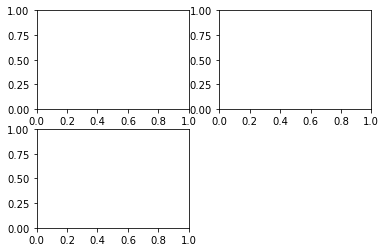

In [8]:
%matplotlib inline
import time
import pylab as pl
from IPython import display

Etoile, KX, KV, VectPost, VectForce = InistSystConnu(1)

N_Iteration = 50
PasDeTemps = 2.5
NombreDeCorps = 2

fig = plt.figure()
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)

C1 = list()
C2 = list()
for i in range(N_Iteration):

    VectPost, VectForce, Etoile, KX, KV = RungeKutta(NombreDeCorps, PasDeTemps, VectPost, VectForce, Etoile, KX, KV)
   
    print(Etoile[0].Position, Etoile[1].Position)

    # C1.append(Etoile[0].Position)    
    # C2.append(Etoile[1].Position)

    # ax1.clear()
    # ax1.plot(Etoile[0].Position[0], Etoile[0].Position[1], 'ro')
    # ax1.plot(Etoile[1].Position[0], Etoile[1].Position[1], 'bo')
    # for j in range(len(C1)):
    #     print( C1[j][0], C1[j][1] )
    #     ax1.plot(C1[j][0], C1[j][1], '.r')
    #     ax1.plot(C2[j][0], C2[j][1], '.b')
    # ax1.set_title('XY')
    # ax1.set_xlim(-1000,1000)
    # ax1.set_ylim(-1000,1000)

    # # ax.clear()
    # ax2.plot(Etoile[0].Position[0], Etoile[0].Position[2], 'ro')
    # ax2.plot(Etoile[1].Position[0], Etoile[1].Position[2], 'bo')
    # ax2.set_title('XZ')
    # ax2.set_ylim(-1000,1000)
    # # ax.clear()
    # ax3.plot(Etoile[0].Position[1], Etoile[0].Position[2], 'ro')
    # ax3.plot(Etoile[1].Position[1], Etoile[1].Position[2], 'bo')
    # ax3.set_title('YZ')
    # ax3.set_ylim(-1000,1000)

    # fig.suptitle(i)

    # display.clear_output(wait=True)
    # display.display(pl.gcf())
    # time.sleep(.1)

# fig.show()
    